In [8]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [9]:
mfname = "../build/ex1.meta"
fname = "../build/ex1.data"

In [10]:
class GridData:
    'Grid metadata.'
    
    def __init__(self, mfname):
        'Load data from *.meta file.'

        mf = open(mfname, 'r')
        self.m = int(mf.readline().strip('\n').split(sep='=')[1])

        self.c = []
        for _ in range(self.m):
            a = mf.readline().strip('\n').strip('()').split(sep=',')
            self.c.append(complex(float(a[0]), float(a[1])))

        self.r = []
        for _ in range(self.m):
            a = mf.readline().strip('\n')
            self.r.append(float(a))
    
        self.res = int(mf.readline().strip('\n').split(sep='=')[1])

        a = mf.readline().strip('\n').split(sep=' ')
        self.xmin = float(a[0])
        self.xmax = float(a[1])
        self.ymin = float(a[2])
        self.ymax = float(a[3])
        
        self.dx = (self.xmax - self.xmin)/self.res
        self.dy = (self.ymax - self.ymin)/self.res

        mf.close()
        
    def gridloc(self, point):
        'Calc grid location given point(s).'
        
        # x = xmin + ix*dx => ix = (x - xmin)//dx
        x = point.real
        ix = np.floor_divide((x - self.xmin), self.dx).astype(int)
        
        y = point.imag
        iy = np.floor_divide((y - self.ymin), self.dy).astype(int)

        if ix.size == 1:
            return [ix, iy]
        else:        
            return np.concatenate((ix.reshape(ix.size, 1), 
                                   iy.reshape(iy.size, 1)), axis=1)

In [11]:
def phasepaint(data):
    'Generate rgb phase picture of data.'
    
    # Maps angle of z from [0,pi]U[-pi,0] to [0,1]
    ph = (np.angle(-data) + np.pi)/(2*np.pi)

    # Scalar map object ftw.
    smap = mpl.cm.ScalarMappable(cmap='hsv')
    
    return smap.to_rgba(ph)

In [12]:
gdat = GridData(mfname)

data = np.fromfile(fname, dtype=np.complex128)
data = data.reshape(2, data.size//2)

imdat = phasepaint(data[1,:])
loc = gdat.gridloc(data[0,:])

In [13]:
img = np.full([gdat.res, gdat.res, 4], [0., 0., 0., 1.])
for xy, rgb in zip(loc, imdat):
    img[tuple(xy)] = rgb

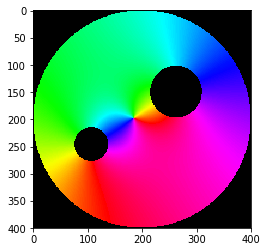

In [17]:
fig = plt.figure()
ax = fig.gca()
ax.imshow(img,
         interpolation='none',
         aspect='equal')
plt.savefig('../build/ex1.png', bbox_inches='tight')